In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import eurostat

In [2]:
#!pip install eurostat

In [3]:
#!pip install pycountry

In [4]:
#!conda install cartopy

# Data acquisition

In [5]:
data = eurostat.get_data_df("NRG_CB_RW$DEFAULTVIEW")
data = data.drop('freq', axis=1)
data = data.drop('nrg_bal', axis=1)
data = data.drop('unit', axis=1)
# data = data.rename(columns={'geo\\TIME_PERIOD':'TIME'})
data = data.drop(data[data['geo\TIME_PERIOD']=="BA"].index)
data = data.drop(data[data['geo\TIME_PERIOD']=="EA19"].index)
data = data.drop(data[data['geo\TIME_PERIOD']=="EA20"].index)
countries = {"AL":"Albania","AT":"Austria","BA":"","BE":"Belgium","BG":"Bulgaria","CY":"Cyprus","CZ":"Czechia","DE":"Germany (until 1990 former territory of the FRG)","DK":"Denmark",
            "EE":"Estonia","EL":"Greece","ES":"Spain","FI":"Finland","FR":"France","GE":"Georgia","HR":"Croatia","HU":"Hungary","IE":"Ireland","IS":"Iceland","IT":"Italy","LI":"Liechtenstein",
            "LT":"Lithuania","LU":"Luxembourg","LV":"Latvia","MD":"Moldova","ME":"Montenegro","MK":"North Macedonia","MT":"Malta","NL":"Netherlands","NO":"Norway","PL":"Poland","PT":"Portugal",
            "RO":"Romania","RS":"Serbia","SE":"Sweden","SI":"Slovenia","SK":"Slovakia","TR":"Türkiye","UA":"Ukraine","UK":"United Kingdom","XK":"Kosovo (under United Nations Security Council Resolution 1244/99)"}

In [6]:
solidBiofuels = data[data['siec']=="R5110-5150_W6000RI"]
solidBiofuels = solidBiofuels.replace({"geo\TIME_PERIOD":countries})
solidBiofuels = solidBiofuels.drop('siec', axis=1).reset_index().drop('index', axis=1)

Geothermal = data[data['siec']=="RA200"]
Geothermal = Geothermal.replace({"geo\TIME_PERIOD":countries})
Geothermal = Geothermal.drop('siec', axis=1).reset_index().drop('index', axis=1)

Biogases = data[data['siec']=="R5300"]
Biogases = Biogases.replace({"geo\TIME_PERIOD":countries})
Biogases = Biogases.drop('siec', axis=1).reset_index().drop('index', axis=1)

Solar = data[data['siec']=="RA410"]
Solar = Solar.replace({"geo\TIME_PERIOD":countries})
Solar = Solar.drop('siec', axis=1).reset_index().drop('index', axis=1)

waste = data[data['siec']=="W6210"]
waste = waste.replace({"geo\TIME_PERIOD":countries})
waste = waste.drop('siec', axis=1).reset_index().drop('index', axis=1)

# Data Cleaning

In [7]:
#remove columns with all NaN values
def cleanDataFrame(df):
    return df.dropna(axis=1, how='all')

#replace NaN and other non-numeric values with 0, and convert data to numeric type
def getNotNanData(df):
    df = df.replace({'NaN': 0, 'nan': 0,'p':0,'e':0,'-':0})
    df = df.replace(np.nan, 0)
    for i in range(1,11):
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i] ,errors='coerce').fillna(0)
    return df

In [8]:
#Time frequency	Energy balance	Standard international energy product classification (SIEC)	Unit of measure
# Sheet 1	Annual	Indigenous production	Geothermal	Terajoule
# Sheet 2	Annual	Indigenous production	Solar thermal	Terajoule
# Sheet 3	Annual	Indigenous production	Primary solid biofuels	Terajoule
# Sheet 4	Annual	Indigenous production	Biogases	Terajoule
# Sheet 5	Annual	Indigenous production	Renewable municipal waste	Terajoule

#Geothermal
energy = ['Geothermal','Solar thermal','Primary solid biofuels','Biogases','Renewable municipal waste']
years = [ i for i in  range(2012,2022)]

indigenous_production = []

Geothermal = cleanDataFrame(Geothermal)
indigenous_production.append(Geothermal.iloc[12,1:11].tolist())

#Solar thermal
Solar = cleanDataFrame(Solar)
indigenous_production.append(Solar.iloc[12,1:11].tolist())

#Primary solid biofuels
solidBiofuels = cleanDataFrame(solidBiofuels)
indigenous_production.append(solidBiofuels.iloc[12,1:11].tolist())

#Biogases
Biogases = cleanDataFrame(Biogases)
indigenous_production.append(Biogases.iloc[12,1:11].tolist())

#Renewable municipal waste
waste = cleanDataFrame(waste)
indigenous_production.append(waste.iloc[12,1:11].tolist())

In [9]:
Geothermal = getNotNanData(Geothermal)
Solar = getNotNanData(Solar)
solidBiofuels = getNotNanData(solidBiofuels)
Biogases = getNotNanData(Biogases)
waste = getNotNanData(waste)

# Data Analysis

## Q2: What are the primary changes on renewable energy?

### Production of 5 new energy sources in Europe (2012-2021)

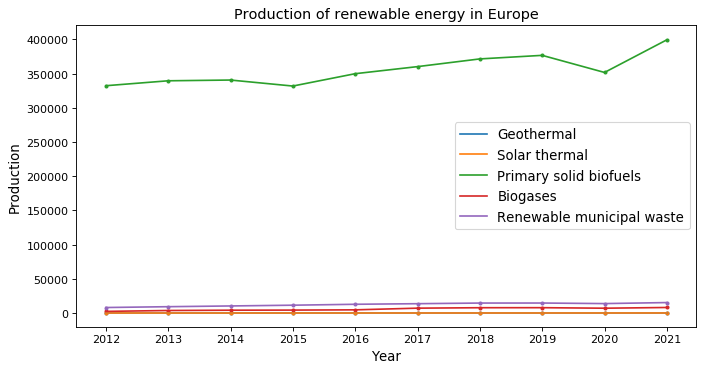

In [10]:
fig = plt.figure(figsize=(10, 5), dpi=80)

x = [ i for i in  range(len(years))]
cmap = plt.get_cmap('tab10')

for i in range(len(energy)):
    
    plt.plot(x, indigenous_production[i], label=energy[i],color=cmap(i))
    plt.scatter(x, indigenous_production[i],color=cmap(i),s=7)

plt.xticks(x, years)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Production',fontsize=12)
plt.title('Production of renewable energy in Europe',fontsize=13)
plt.legend(fontsize=12)
plt.show()

These data show a steady increase in capacity for geothermal energy, solar thermal, renewable municipal waste, biogas and biosolid fuels in the EU region from 2012 to 2021. We can say that the investment and development of renewable energy in the EU region has achieved some results, but continued efforts are needed to further promote the development and application of renewable energy.

In [11]:
# bartChart of 2d
def getBartChartOfEnergy(Geothermal,energy_name):
    res = Geothermal.sort_values(by='2021', ascending=False)
    
    topTen_name = res.iloc[1:11,0].to_list()

    for i in range(10):
        if 'Germany' in topTen_name[i]:
            topTen_name[i]='Germany'
    eng = res.iloc[1:11,10].to_list()
    

    fig = plt.figure(figsize=(14, 5))

    x = [i for i in range(10)]
    cmap = plt.get_cmap('tab10')

    clors = [cmap(i) for i in range(10)]

    bars = plt.bar(x, eng,color=clors,alpha=0.5)
    
    
    min_d = 100000000
    max_d = 0
    for i, bar in enumerate(bars):
        if  min_d > bar.get_height():
            min_d = bar.get_height()
        if max_d < bar.get_height():
            max_d = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), eng[i], ha='center', va='bottom',fontsize=10)

        
    plt.xticks(x, topTen_name,rotation=30,fontsize=12)
    plt.title('Top 10 '+energy_name+' energy production in Europe in 2021')
    plt.xlabel('Country',fontsize=12)
    plt.ylim(ymax=max_d*1.2)
    plt.ylabel('Production',fontsize=15)
    plt.show()
    
    return topTen_name,eng

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# bartChart of 3d
def get3dBart(new_ten_name,Solar,energy_name):
    
    #xs -year
    #ys -country
    #zs -production

    engs = []
    for name in new_ten_name:
        if 'Germany' in name:
            name = 'Germany (until 1990 former territory of the FRG)'
        eng1 = Solar[ Solar['geo\TIME_PERIOD']==name].values.tolist()[0][:]
        print(eng1)
        engs.append(eng1)

    fig = plt.figure(figsize=(12,7))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['lightcoral','lightblue','lightcyan','lightgoldenrodyellow','lightgray','lightgreen','lightpink','lightsalmon','lightseagreen','lightskyblue']

    yticks = [ i for i in range(len(new_ten_name))]


    for c, k,aa in zip(colors,yticks,new_ten_name):

        xs = range(len(engs[k]))
        ys = engs[k]
        cs = [c] * len(xs)
        cs[0] = 'c'
        kk = [k for i in range(len(new_ten_name))]
        ax.bar(xs[1:],ys[1:] , zs=k, zdir='y', color=c,alpha = 1-0.03*k)
        
    ax.set_yticks(yticks)
    

    xs_label = [i for i in range(2012,2022,1)]
    
    
    plt.yticks(yticks,new_ten_name,fontsize=10)
    plt.xticks(xs[1:],xs_label,fontsize=10,rotation=30)
    plt.title('Top 10 '+energy_name+' energy production in Europe in 2012-2021',fontsize=15)
    plt.show()

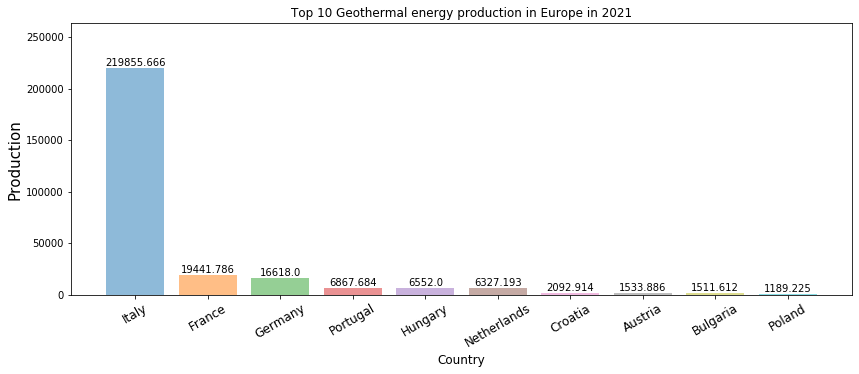

In [13]:
ten_geo,e = getBartChartOfEnergy(Geothermal,energy[0])
ten_geo.reverse() 

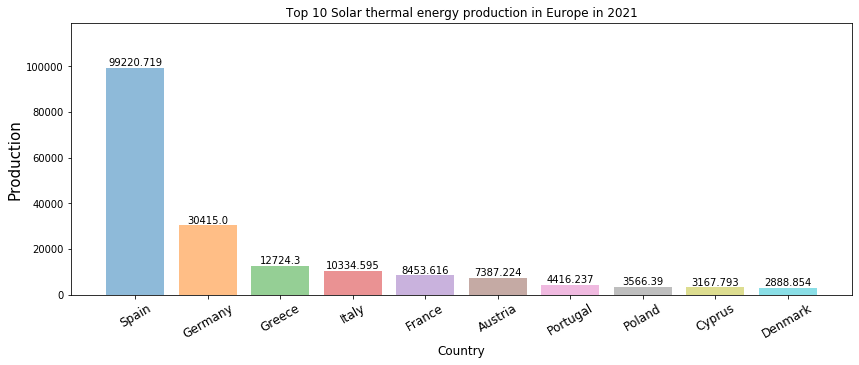

In [14]:
ten_sol,e = getBartChartOfEnergy(Solar,energy[1])
ten_sol.reverse()

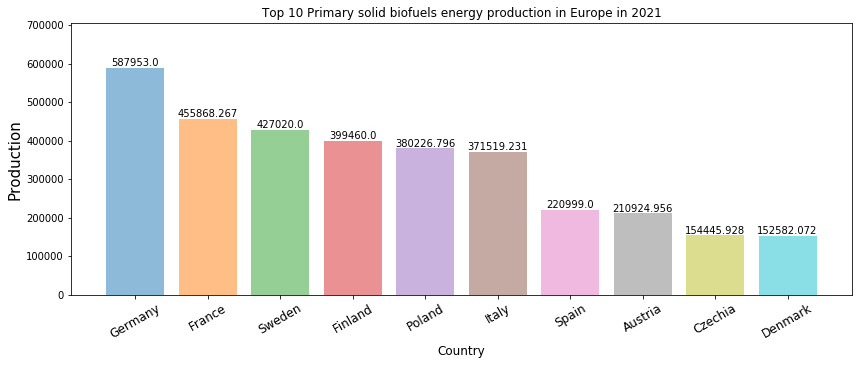

In [15]:
ten_pri, e = getBartChartOfEnergy(solidBiofuels,energy[2])
ten_pri.reverse()

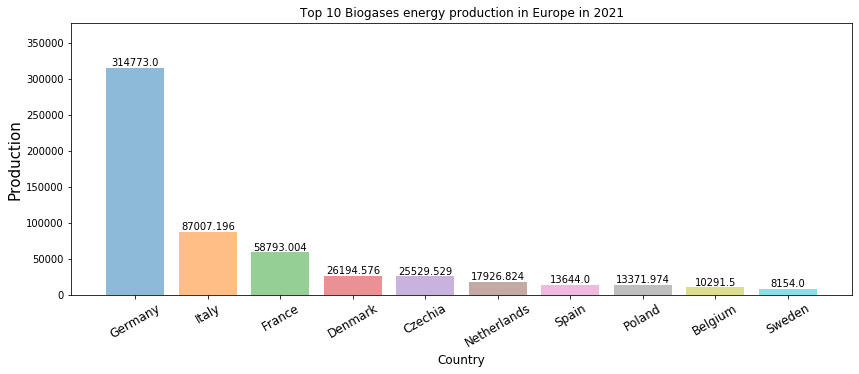

In [16]:
ten_bio, e = getBartChartOfEnergy(Biogases,energy[3])
ten_bio.reverse()

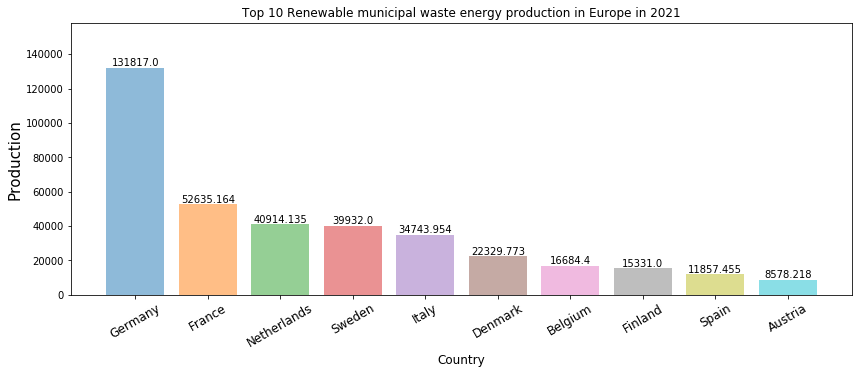

In [17]:
ten_ren,e=getBartChartOfEnergy(waste,energy[4])
ten_ren.reverse()

['Germany', 'Italy', 'France', 'Sweden', 'Finland', 'Poland', 'Spain', 'Austria', 'Denmark', 'Czechia']
[595191.8369999999, 475531.0, 423039.0, 404221.34099999996, 345729.243, 235109.18600000002, 204049.639, 184801.72600000002, 181110.61, 154554.745]


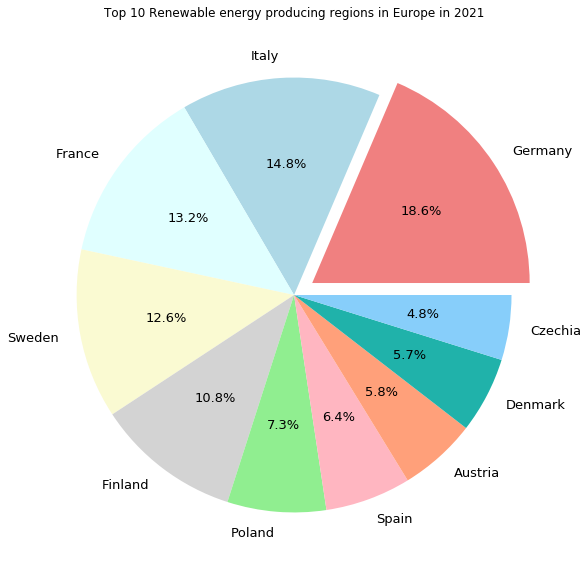

In [18]:
res = waste.add(Solar)
res = res.add(Geothermal)
res = res.add(solidBiofuels)
res = res.add(Biogases)

res = res.sort_values(by='2021', ascending=False)
topTen_name = res.iloc[1:11,0].to_list()

fig = plt.figure(figsize=(10, 10))

for i in range(10):
    if 'Germany' in topTen_name[i]:
        topTen_name[i]='Germany'
        continue
    index = int(len(topTen_name[i])/5)
    topTen_name[i]= topTen_name[i][0:index]
eng = res.iloc[3:13,10].to_list()

colors = ['lightcoral','lightblue','lightcyan','lightgoldenrodyellow','lightgray','lightgreen','lightpink','lightsalmon','lightseagreen','lightskyblue']

explode =[0.0 for i in range(10)]
explode[0]=0.1
patches,l_text,p_text = plt.pie(eng, labels=topTen_name, autopct='%1.1f%%',explode=explode,pctdistance = 0.6,colors=colors)

print(topTen_name)
print(eng)
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
    
plt.title('Top 10 Renewable energy producing regions in Europe in 2021')

plt.show()

In [19]:
#data clean
res1 = res
res1 = res1.sort_values(by='2021', ascending=False)
topTen_name = res1.iloc[1:40,0].to_list()
for i in range(len(topTen_name)):
    if 'Germany' in topTen_name[i]:
        topTen_name[i]='Germany'
        continue
    if 'Kosovo' in topTen_name[i]:
        topTen_name[i] = 'Kosovo '
        continue
    index = int(len(topTen_name[i])/5)
    topTen_name[i]= topTen_name[i][0:index]

eng = res1.iloc[1:40,10].to_list()
max_value = max(eng)
data_dict = {}

for i in range(len(topTen_name)):
    data_dict[topTen_name[i]] = eng[i]

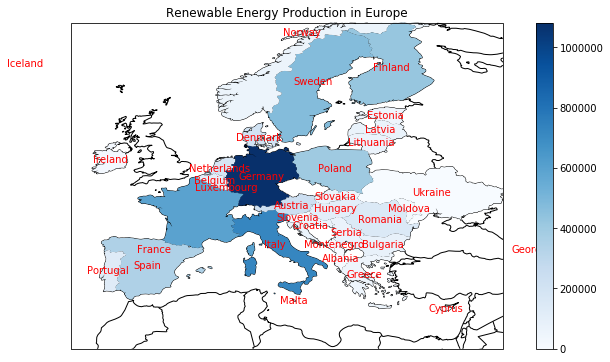

In [20]:
import re
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

crs = ccrs.PlateCarree()

shpfilename = shpreader.natural_earth(resolution='50m', category='cultural',
                                      name='admin_0_countries')
readr = shpreader.Reader(shpfilename)
countries = readr.records()

cmap = plt.cm.get_cmap('Blues')

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

ax.set_extent([-13, 40, 30, 70], crs=ccrs.PlateCarree())


for country in countries:
    name = country.attributes['NAME_LONG']
    match = re.search(r'\b\w+\b', name)
    if match:
        first_word = match.group()
        name = first_word
    
    if name in topTen_name:
        value = data_dict[name]
        if country.geometry.geom_type =='Polygon':
            ax.add_geometries([country.geometry], crs, facecolor=cmap((value+1000)/(max(eng))))
            center = country.geometry.centroid
            ax.text(center.x, center.y, name, ha='center', va='center', fontsize=10,color='r')
        else:
            ax.add_geometries(country.geometry, crs, facecolor=cmap((value+1000)/(max(eng))))
            center = country.geometry.centroid
            ax.text(center.x, center.y, name, ha='center', va='center', fontsize=10,color='r')

plt.title('Renewable Energy Production in Europe')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max_value))
sm._A = []
plt.colorbar(sm)

plt.show()

Germany, Italy and France are the three countries with the highest capacity of renewable energy (geothermal, solar, solid biomass, biogas and renewable municipal waste) in Europe, reflecting the active development and investment in renewable energy.

### Top 10 Geothermal energy production in Europe in 2012-2021

['Poland', 661.0, 778.0, 847.0, 909.0, 930.0, 945.538, 991.067, 1050.398, 1073.481, 1189.225]
['Bulgaria', 1400.0, 1400.0, 1400.0, 1400.0, 1450.0, 1450.0, 1450.0, 1470.0, 1495.0, 1511.612]
['Austria', 1525.948, 1527.298, 1319.063, 1459.104, 1473.956, 1699.624, 1628.295, 1422.831, 1524.535, 1533.886]
['Croatia', 291.0, 286.0, 324.0, 373.0, 379.0, 345.1, 392.2, 1942.686, 2451.335, 2092.914]
['Netherlands', 495.0, 993.0, 1502.0, 2448.34, 2843.526, 3046.547, 3730.558, 5563.916, 6185.279, 6327.193]
['Hungary', 4490.0, 4721.0, 3800.0, 4426.0, 5026.0, 5590.0, 6005.0, 6611.0, 6274.0, 6552.0]
['Portugal', 5652.0, 7551.0, 7889.0, 7829.0, 6602.0, 8329.235, 8860.932, 8286.804, 8338.915, 6867.684]
['Germany (until 1990 former territory of the FRG)', 3895.0, 6192.0, 7622.0, 8908.0, 11211.0, 10696.0, 12635.0, 13955.0, 15618.0, 16618.0]
['France', 10126.311, 12728.451, 12252.115, 12704.684, 13989.596, 17700.184, 18223.454, 19268.544, 19978.331, 19441.786]
['Italy', 207551.0, 210020.0, 219177.0, 228997

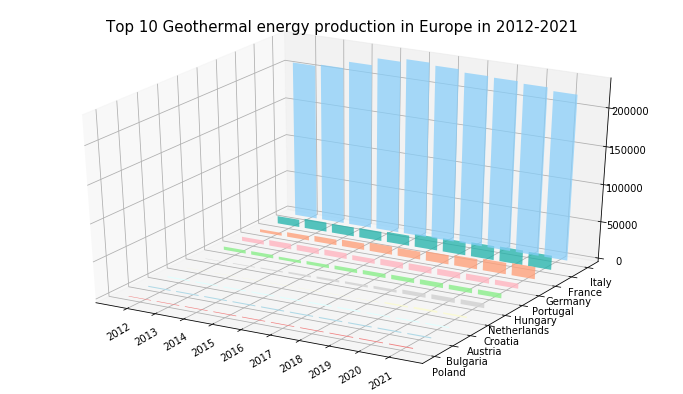

In [21]:
get3dBart(ten_geo,Geothermal,energy[0])

### Top 10 Solar thermal energy production in Europe in 2012-2021

['Denmark', 880.1, 1026.852, 1300.135, 1537.657, 1980.392, 2329.654, 2761.297, 2958.232, 3273.084, 2888.854]
['Cyprus', 2700.0, 2751.0, 2796.0, 2841.0, 2887.0, 2939.808, 3015.39, 3062.288, 3113.741, 3167.793]
['Poland', 620.0, 1035.0, 1455.0, 1885.0, 2189.0, 2280.471, 2383.356, 3008.736, 3355.466, 3566.39]
['Portugal', 2820.0, 3046.0, 3218.0, 3360.0, 3515.0, 3683.031, 3952.566, 4033.172, 4215.771, 4416.237]
['Austria', 7249.207, 7390.33, 7566.996, 7671.601, 7671.865, 7639.128, 7575.97, 7494.243, 7619.146, 7387.224]
['France', 5646.766, 6077.768, 6444.026, 6715.608, 6948.548, 7207.337, 7582.97, 7843.137, 8145.418, 8453.616]
['Italy', 6504.0, 7042.0, 7519.0, 7955.0, 8382.0, 8745.962, 9150.878, 9550.429, 9897.752, 10334.595]
['Greece', 10194.0, 10338.0, 10602.0, 10856.0, 11071.0, 11365.0, 11607.0, 11968.0, 12271.9, 12724.3]
['Germany (until 1990 former territory of the FRG)', 23902.0, 24123.0, 25942.0, 27743.0, 27695.0, 28273.0, 31950.0, 30538.0, 32057.0, 30415.0]
['Spain', 70477.824, 875

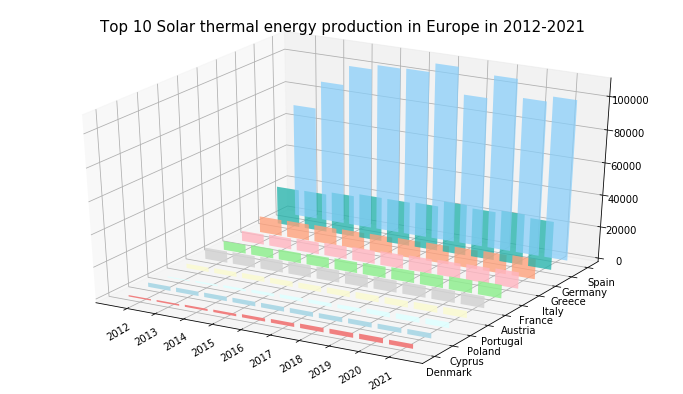

In [22]:
get3dBart(ten_sol,Solar,energy[1])

### Top 10 Primary solid biofuels energy production in Europe in 2012-2021

['Denmark', 100476.0, 101700.0, 100361.1, 106873.985, 116124.126, 130225.198, 126986.719, 125153.254, 125303.385, 152582.072]
['Czechia', 106219.0, 110949.0, 115683.0, 120319.0, 121665.0, 124000.98, 124801.259, 135964.521, 140965.575, 154445.928]
['Austria', 208862.726, 208770.105, 192228.71, 197300.653, 200412.63, 204295.481, 193908.949, 193203.912, 195103.59, 210924.956]
['Spain', 213321.0, 224214.0, 220876.0, 220234.0, 202528.0, 208487.0, 206908.0, 210721.0, 211394.0, 220999.0]
['Italy', 351602.0, 370451.0, 337724.0, 359145.0, 353416.0, 377342.389, 356342.932, 356404.005, 349741.667, 371519.231]
['Poland', 292562.0, 286243.0, 282835.0, 288204.0, 277173.0, 263382.3, 393301.671, 393300.142, 390648.703, 380226.796]
['Finland', 332358.0, 339565.0, 340661.0, 331879.0, 349935.0, 360277.0, 371549.0, 376750.0, 351759.0, 399460.0]
['Sweden', 394455.0, 385497.0, 372058.0, 380453.0, 393076.0, 397917.0, 389863.0, 401231.0, 397210.0, 427020.0]
['France', 398239.114, 441475.986, 380615.95, 410934

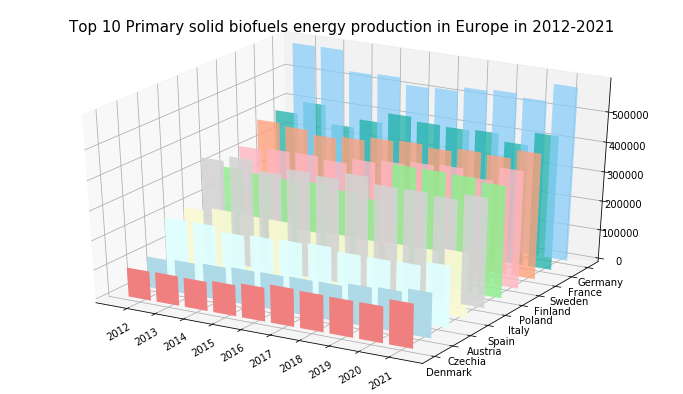

In [23]:
get3dBart(ten_pri,solidBiofuels,energy[2])

### Top 10 Biogases energy production in Europe in 2012-2021

['Sweden', 5303.0, 6070.0, 6422.0, 7009.0, 7265.0, 7445.0, 7359.0, 7600.0, 7780.0, 8154.0]
['Belgium', 6809.1, 8358.6, 9129.9, 9860.4, 9814.4, 9423.1, 9546.6, 9698.0, 10261.4, 10291.5]
['Poland', 7033.0, 7593.0, 8685.0, 9581.0, 10924.0, 11738.62, 12068.301, 12498.053, 13498.148, 13371.974]
['Spain', 12179.0, 20072.0, 14791.0, 10954.0, 11557.0, 12237.0, 12374.0, 12184.0, 13539.0, 13644.0]
['Netherlands', 12165.0, 12777.0, 13094.0, 13733.059, 13377.41, 13508.671, 13696.226, 14913.297, 17428.542, 17926.824]
['Czechia', 15698.0, 23910.0, 25457.0, 25681.0, 25161.0, 25443.789, 25279.127, 24331.895, 24888.839, 25529.529]
['Denmark', 4399.147, 4587.832, 5561.231, 6285.248, 9047.985, 10906.278, 13333.41, 16481.514, 21151.581, 26194.576]
['France', 21024.115, 24013.607, 25423.321, 28801.248, 31412.412, 33817.19, 36609.292, 40716.538, 45640.314, 58793.004]
['Italy', 49352.0, 76013.0, 82105.0, 78355.0, 78505.0, 79452.908, 79220.551, 84288.213, 84484.094, 87007.196]
['Germany (until 1990 former ter

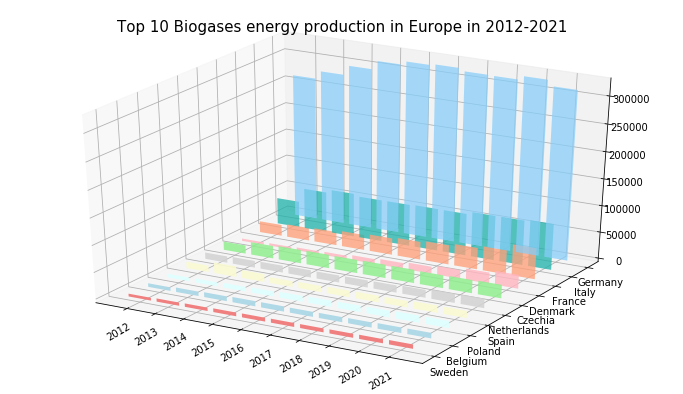

In [24]:
get3dBart(ten_bio,Biogases,energy[3])

### Top 10 Renewable municipal waste energy production in Europe in 2012-2021

['Austria', 6015.706, 6366.289, 7949.203, 7539.849, 8289.188, 7784.058, 7631.369, 7900.781, 8015.599, 8578.218]
['Spain', 7355.0, 8362.0, 8549.0, 10551.0, 9849.0, 10871.5, 10640.0, 10706.0, 9884.487, 11857.455]
['Finland', 8082.0, 9295.0, 10376.0, 11480.0, 12822.0, 13685.0, 14606.0, 14645.0, 13833.0, 15331.0]
['Belgium', 14502.3, 14598.7, 15085.6, 15564.7, 15372.9, 15849.2, 15668.9, 15812.4, 15742.3, 16684.4]
['Denmark', 20540.0, 20602.0, 21298.24, 21955.77, 21974.123, 22482.371, 22272.322, 22839.183, 22883.582, 22329.773]
['Italy', 33780.0, 34651.0, 35941.0, 35419.0, 36453.0, 35721.504, 35446.681, 36551.275, 35303.972, 34743.954]
['Sweden', 32219.0, 34339.0, 35911.0, 38032.0, 34835.0, 36604.0, 34212.0, 36373.0, 40404.0, 39932.0]
['Netherlands', 39794.0, 40689.0, 40265.0, 41570.534, 42281.999, 40415.375, 38656.806, 38480.32, 38844.894, 40914.135]
['France', 50716.634, 52491.509, 52964.619, 51036.094, 52077.274, 52972.997, 52668.316, 52325.601, 51587.606, 52635.164]
['Germany (until 199

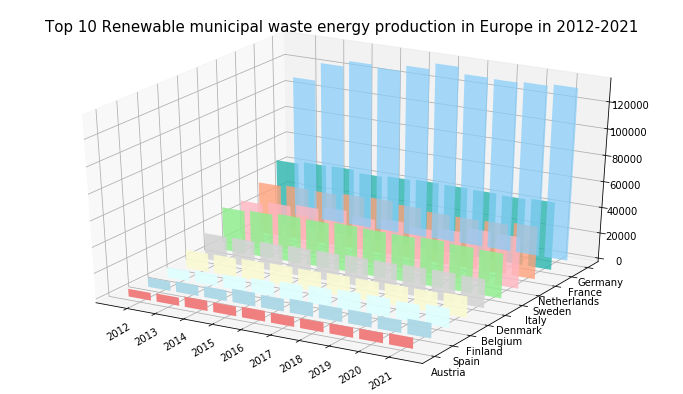

In [25]:
get3dBart(ten_ren,waste,energy[4])

Combining the above data and graphs, it is clear that
Several European countries have made significant progress in the new energy sector in the past decade, such as Germany, Italy and France, where new energy capacity has grown rapidly in the past decade, but in some energy types (such as solar), some other countries (such as Spain and Portugal) have grown at a faster rate.

Geothermal energy has a high potential for development in several European countries and has grown rapidly over the past decade, with countries such as Italy and France experiencing faster growth in geothermal energy capacity.
The development of solar energy is also very important, and countries such as Germany and France are also experiencing rapid growth in solar energy capacity.
Bioenergy capacity such as solid biomass and biogas is also growing to varying degrees in several European countries, such as Germany and Sweden, where solid biomass capacity is growing at a faster rate.
Renewable municipal waste is a relatively small source of energy in several European countries, but it is also growing to some extent in some countries (e.g., Germany and France).

In conclusion, the European countries have made some progress in the development of renewable energy.